In [ ]:
# Run homology bbh of pangenome against target and get associated genes

In [16]:
import os
import pickle

# directories
roary_dir = '/home/omkar/Projects/panGenome/data/entero_project/pan_roary/'
data_dir = '/home/omkar/Projects/panGenome/data/entero_project/genomes/'
df_clusters_dir = '/home/omkar/Projects/panGenome/data/entero_project/general/df_clusters.p'
df_entero_dir = '/home/omkar/Projects/panGenome/data/entero_project/general/df_entero.p'
homology_dir = '/home/omkar/Projects/panGenome/data/entero_project/homology/'
adj_mat_dir = '/home/omkar/Projects/panGenome/data/entero_project/families/adj_mat/'
interproscan_path = '/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/interpro_scan.tsv'
# # variable
subnet_id = 'comp_3'
pan_type = 'genomes' # or 'clusters'
tgt_genus = 'Escherichia'
mibig_id = 'BGC0000972.1'
mibig_name = 'clb'
core_cutoff = 0.85
imp_genome_names = ['CFT073', 'IHE', 'Nissle1917']
imp_genome_ids = ['199310.4', '714962.3', '316435.10']
mibig_id2 = 'BGC0001055.1'

# main function
roary_out = get_roary_out(roary_dir, pan_type, subnet_id, mibig_name, tgt_genus)
df_roary, df_roary_info, df_clusters, df_entero = get_saved_df(df_clusters_dir, df_entero_dir, roary_out)
homology_out_dir = create_homology_dir(homology_dir, mibig_name, tgt_genus)
df_tgt = copy_tgt_faa(data_dir, homology_out_dir, df_entero, tgt_genus)
# df_roary_filtered, df_roary_bool = filter_roary_pangenome(df_roary, core_cutoff)
# create_pan_faa(roary_out, homology_out_dir, df_roary_filtered, data_dir)

# cd /home/omkar/Projects/panGenome/git_notes/Clusterome/scripts/
# python homology_mapping.py -i /home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/tgt_faa/ -o /home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/ -t /home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/temp_faa/pan_genome_filtered.fa -p /home/omkar/Projects/panGenome/data/entero_project/genomes/ 

df_homolog = get_homology_map(homology_out_dir)
# pan_ref_path = os.path.join(roary_out, 'pan_genome_filtered.fa')
# df_pan_features = get_pan_genome_features(df_roary, pan_ref_path, imp_genome_ids, data_dir)

fam1_tgt_clusters, df_fam1_clusters, df_fam1_genomes = get_fam_clusters(adj_mat_dir, subnet_id, mibig_id, tgt_genus, df_clusters, df_entero)
fam2_tgt_clusters, df_fam2_clusters, df_fam2_genomes = get_fam_clusters(adj_mat_dir, subnet_id, mibig_id2, tgt_genus, df_clusters, df_entero)
fam3_tgt_clusters, df_fam3_clusters, df_fam3_genomes = get_other_fam_clusters(adj_mat_dir, subnet_id, mibig_id, mibig_id2, tgt_genus, df_clusters, df_entero)

df_tgt, cluster_color_palette = add_genome_features(df_tgt, df_fam1_genomes, df_fam2_genomes, df_fam3_genomes, mibig_id, mibig_id2)
df_tgt_subnet = get_subnet_ids(df_clusters, df_tgt)

# df_nissle_vs_other_clb = get_nissle_asso_genes(df_genome_cnt, df_homolog_bool,imp_genome_ids[2])

# sys.path.remove('/home/omkar/Projects/panGenome/git_notes/Clusterome/scripts/')



['_1553187017']
/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia already exists!
/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/tgt_faa already exists!
/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/tgt_faa already exists!


/home/omkar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/omkar/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


[None, None, None, None, None, None, None, None]

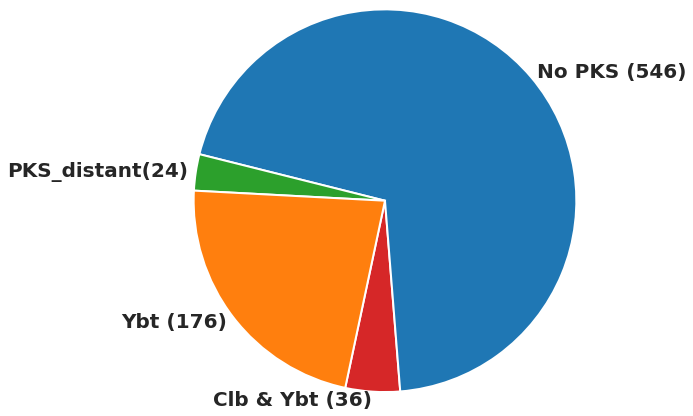

In [19]:
# df_tgt_map = pd.read_pickle('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_tgt_map.p')
df_tgt_map = df_tgt
cluster_cnt = df_tgt_map.groupby('pks_cluster').count()['Genus']
colors = cluster_cnt.index.map(cluster_color_palette)

sns.set(context='poster', style='white', font_scale=1)
# # First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')

label_list = ['Clb & Ybt (36)', 'No PKS (546)', 'PKS_distant(24)','Ybt (176)']
mypie, _ = ax.pie(cluster_cnt, radius=2.2,labels=label_list, startangle = 258, labeldistance=1.04,rotatelabels=False, colors=colors, textprops={'fontsize': 20, 'fontweight':'bold'})
plt.setp( mypie, width=2.2, edgecolor='white')
# plt.pie(cluster_cnt,colors=cluster_color_palette.values(), labels=cluster_cnt)

In [22]:
df_tgt.groupby('pks_cluster').count()

,Genome Name,Organism Name,NCBI Taxon ID,Genome Status,Strain,Serovar,Biovar,Pathovar,MLST,Other Typing,...,Reference,Genus,Genus_cat,max_seq_len,N50_score,N90_score,max_by_total,N90_by_max,N50_by_N90,N50_by_total
pks_cluster,,,,,,,,,,,,,,,,,,,,,
Clb,36,8,36,36,36,6,0,8,24,1,...,36,36,36,36,36,36,36,36,36,36
No_pks,546,39,546,546,521,175,2,112,293,14,...,546,546,546,546,546,546,546,546,546,546
PKS_distant,24,2,24,24,23,5,0,3,14,2,...,24,24,24,24,24,24,24,24,24,24
Ybt,176,15,176,176,170,46,0,24,112,1,...,176,176,176,176,176,176,176,176,176,176


In [8]:
pickle_out = open('/home/omkar/Projects/panGenome/data/entero_project/general/pks_genome_colors.p',"wb")
pickle.dump(cluster_color_palette, pickle_out)
pickle_out.close()

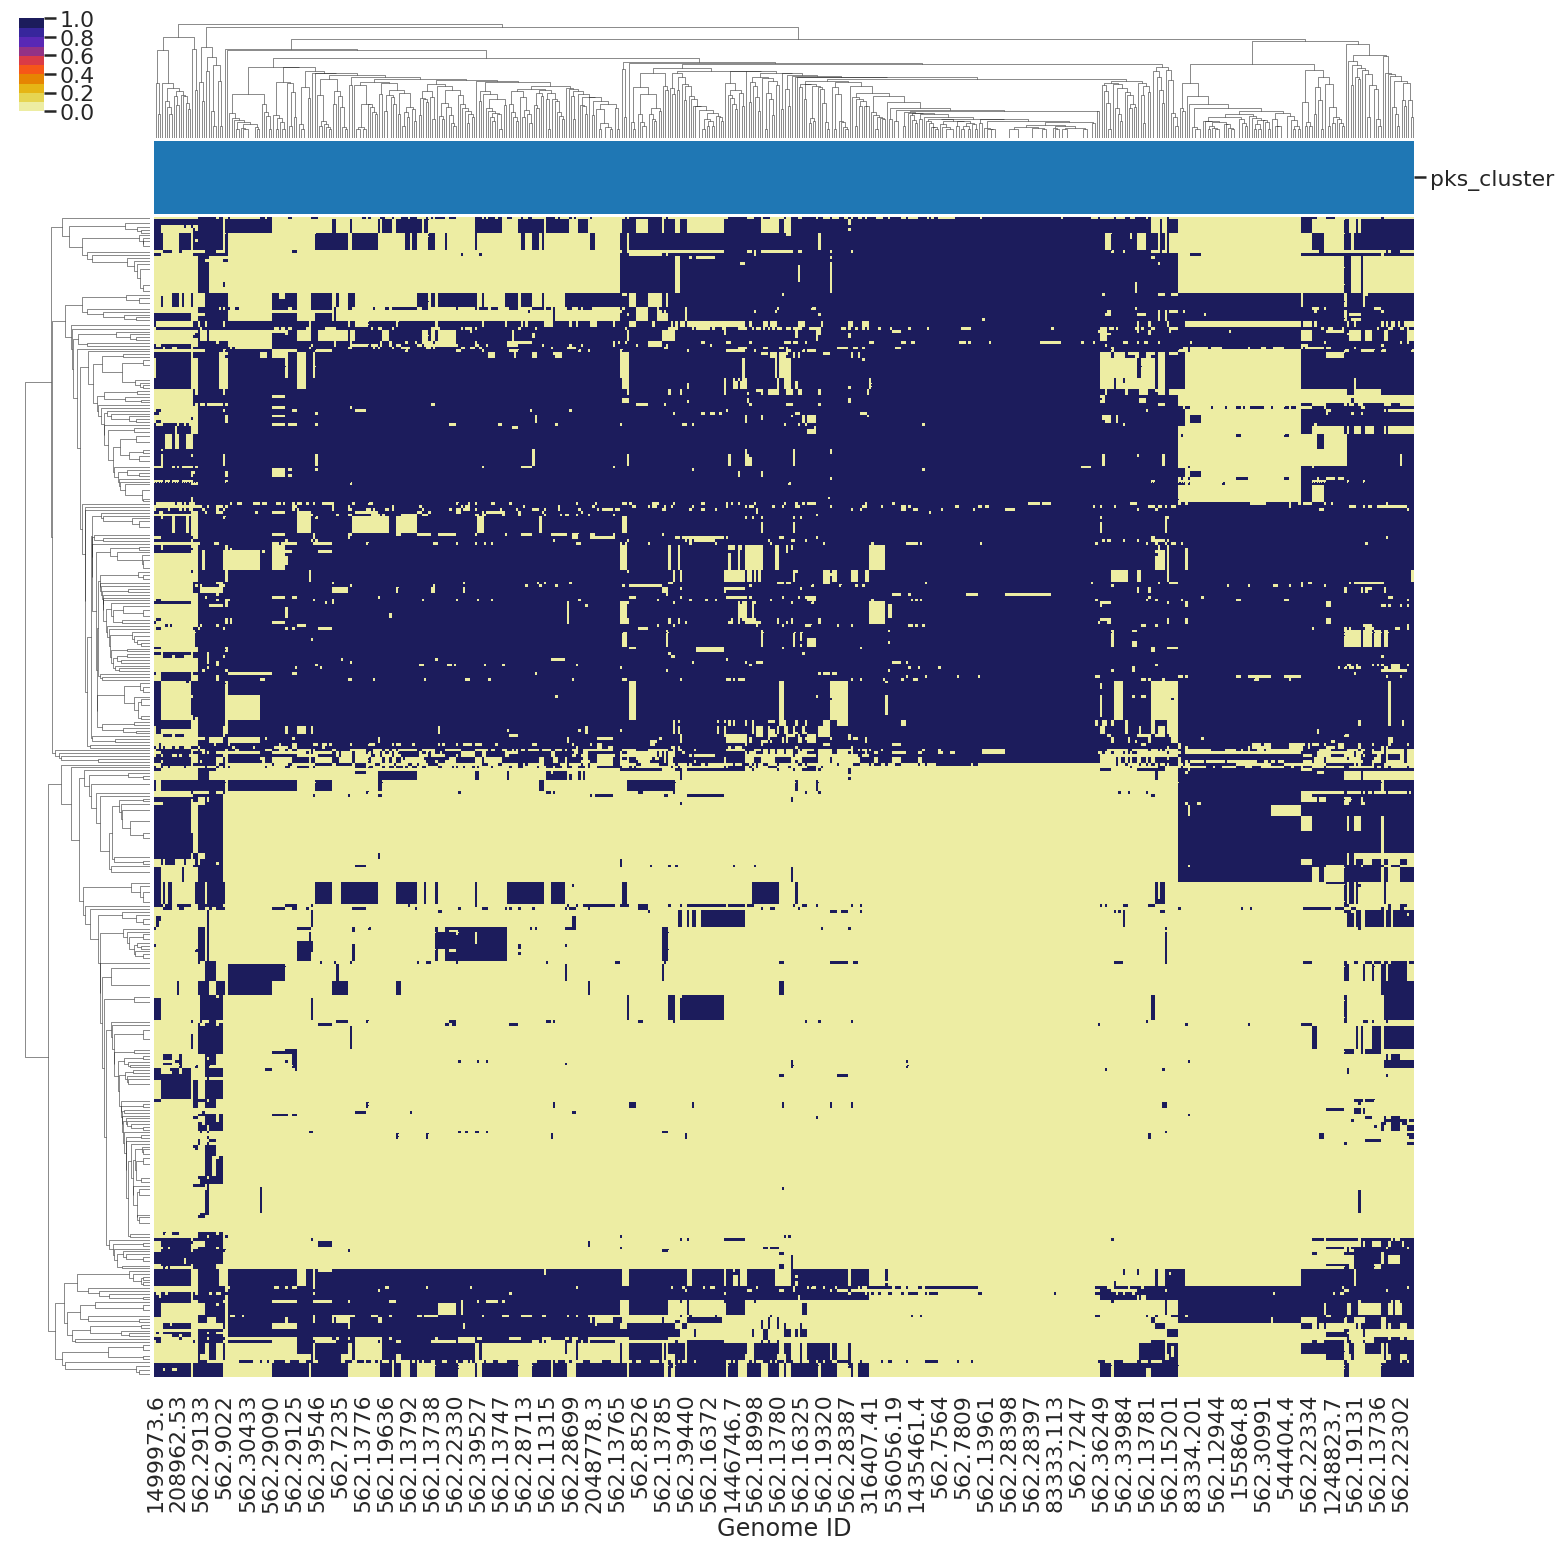

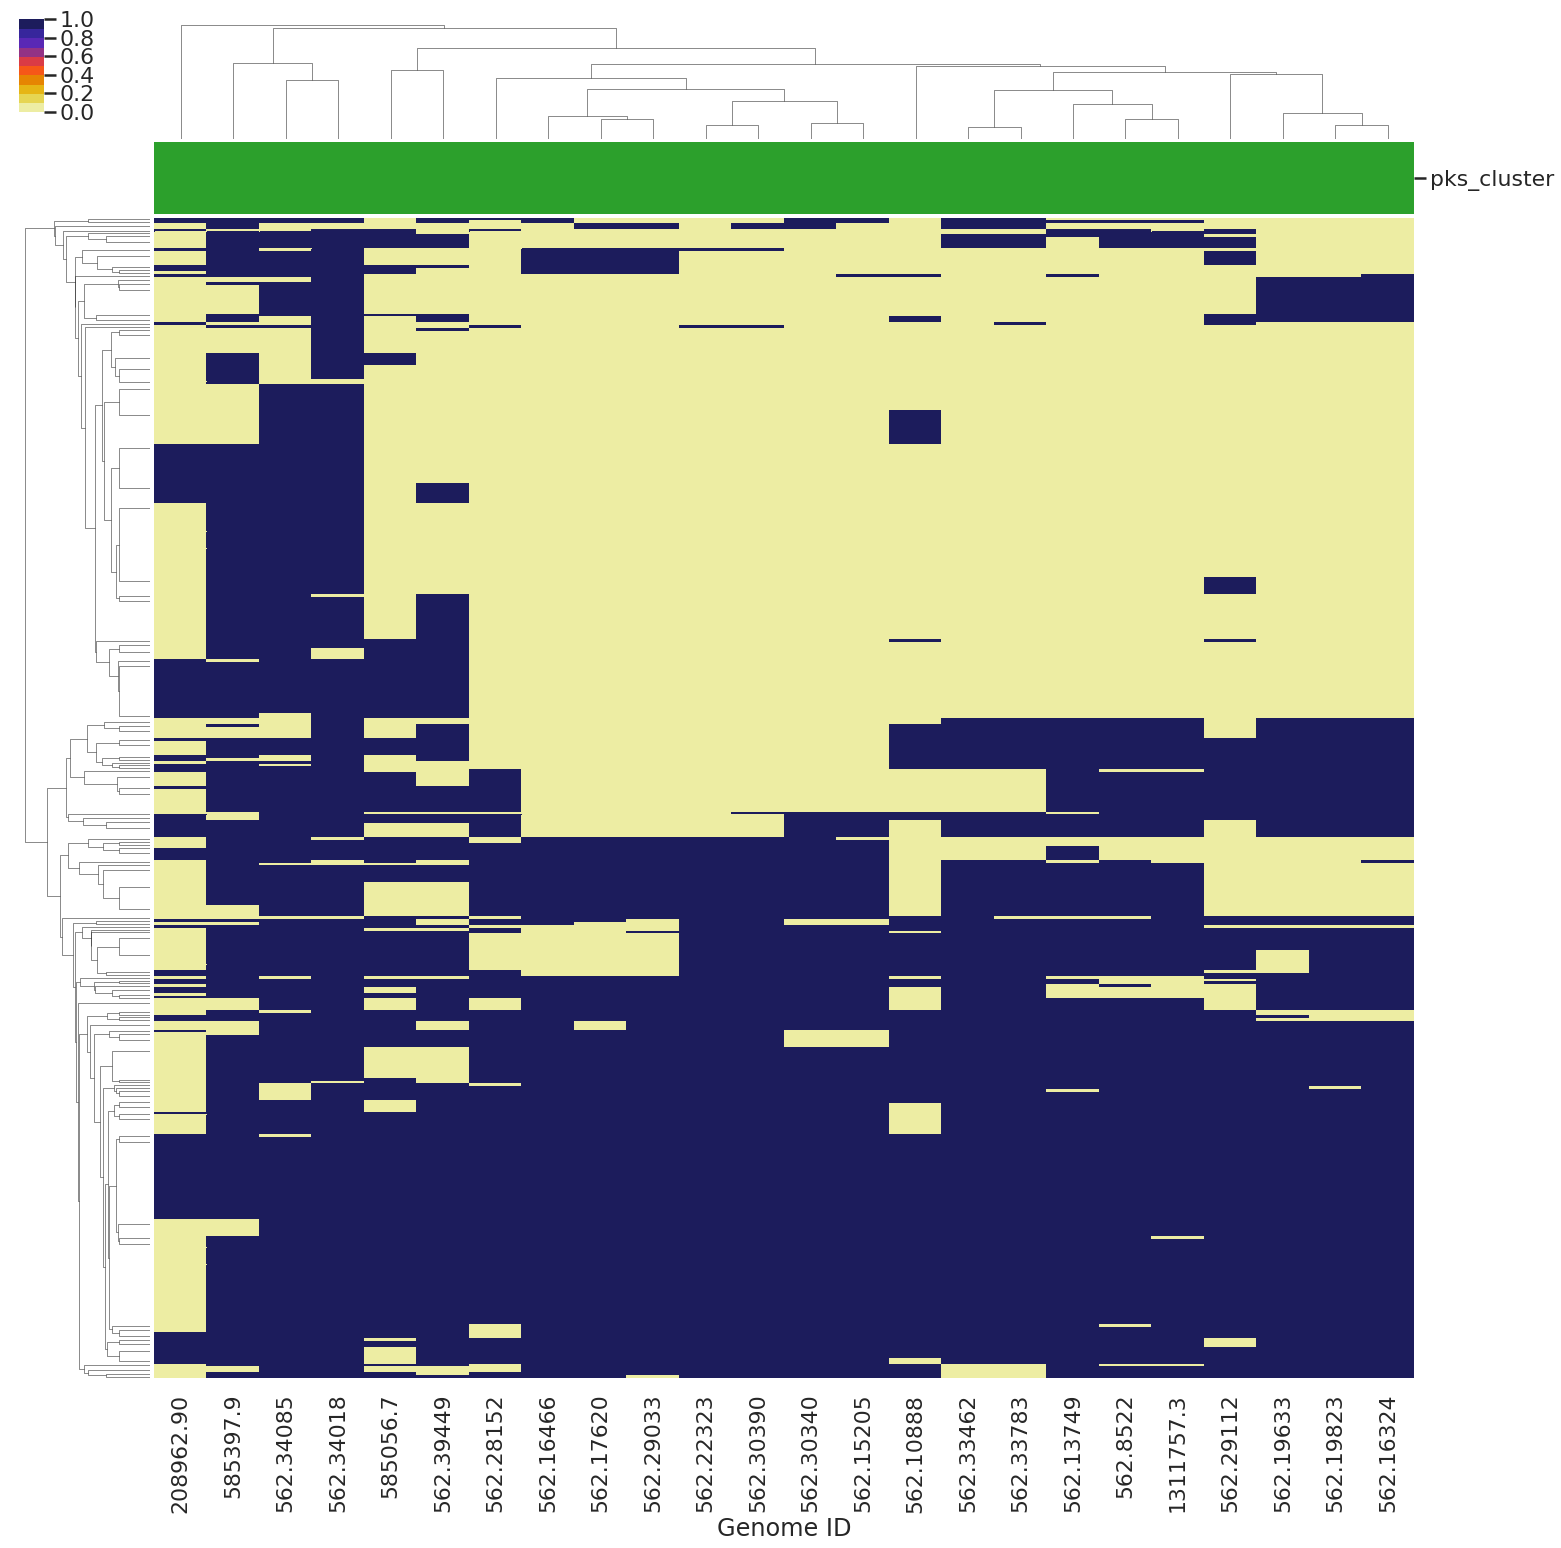

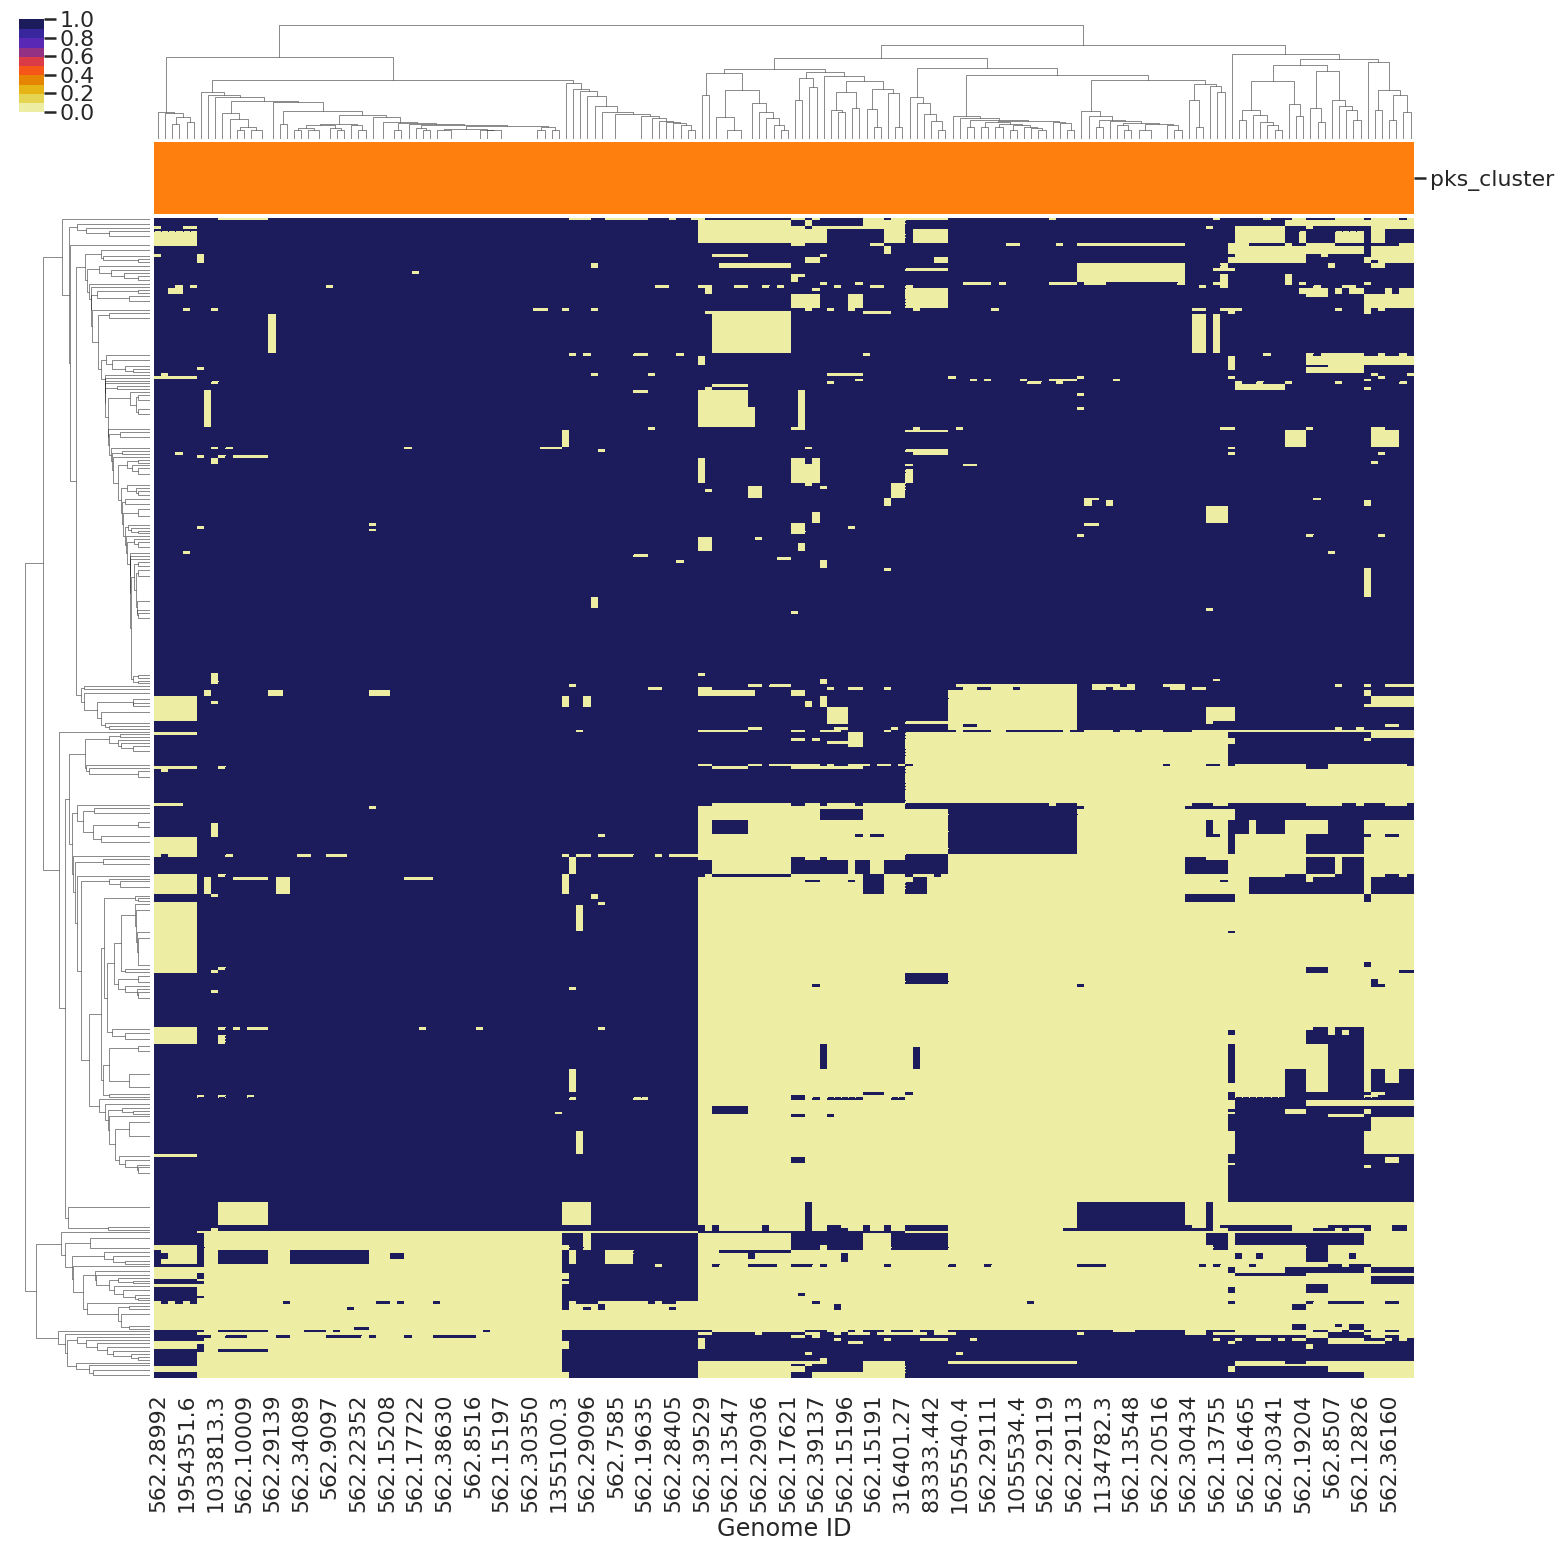

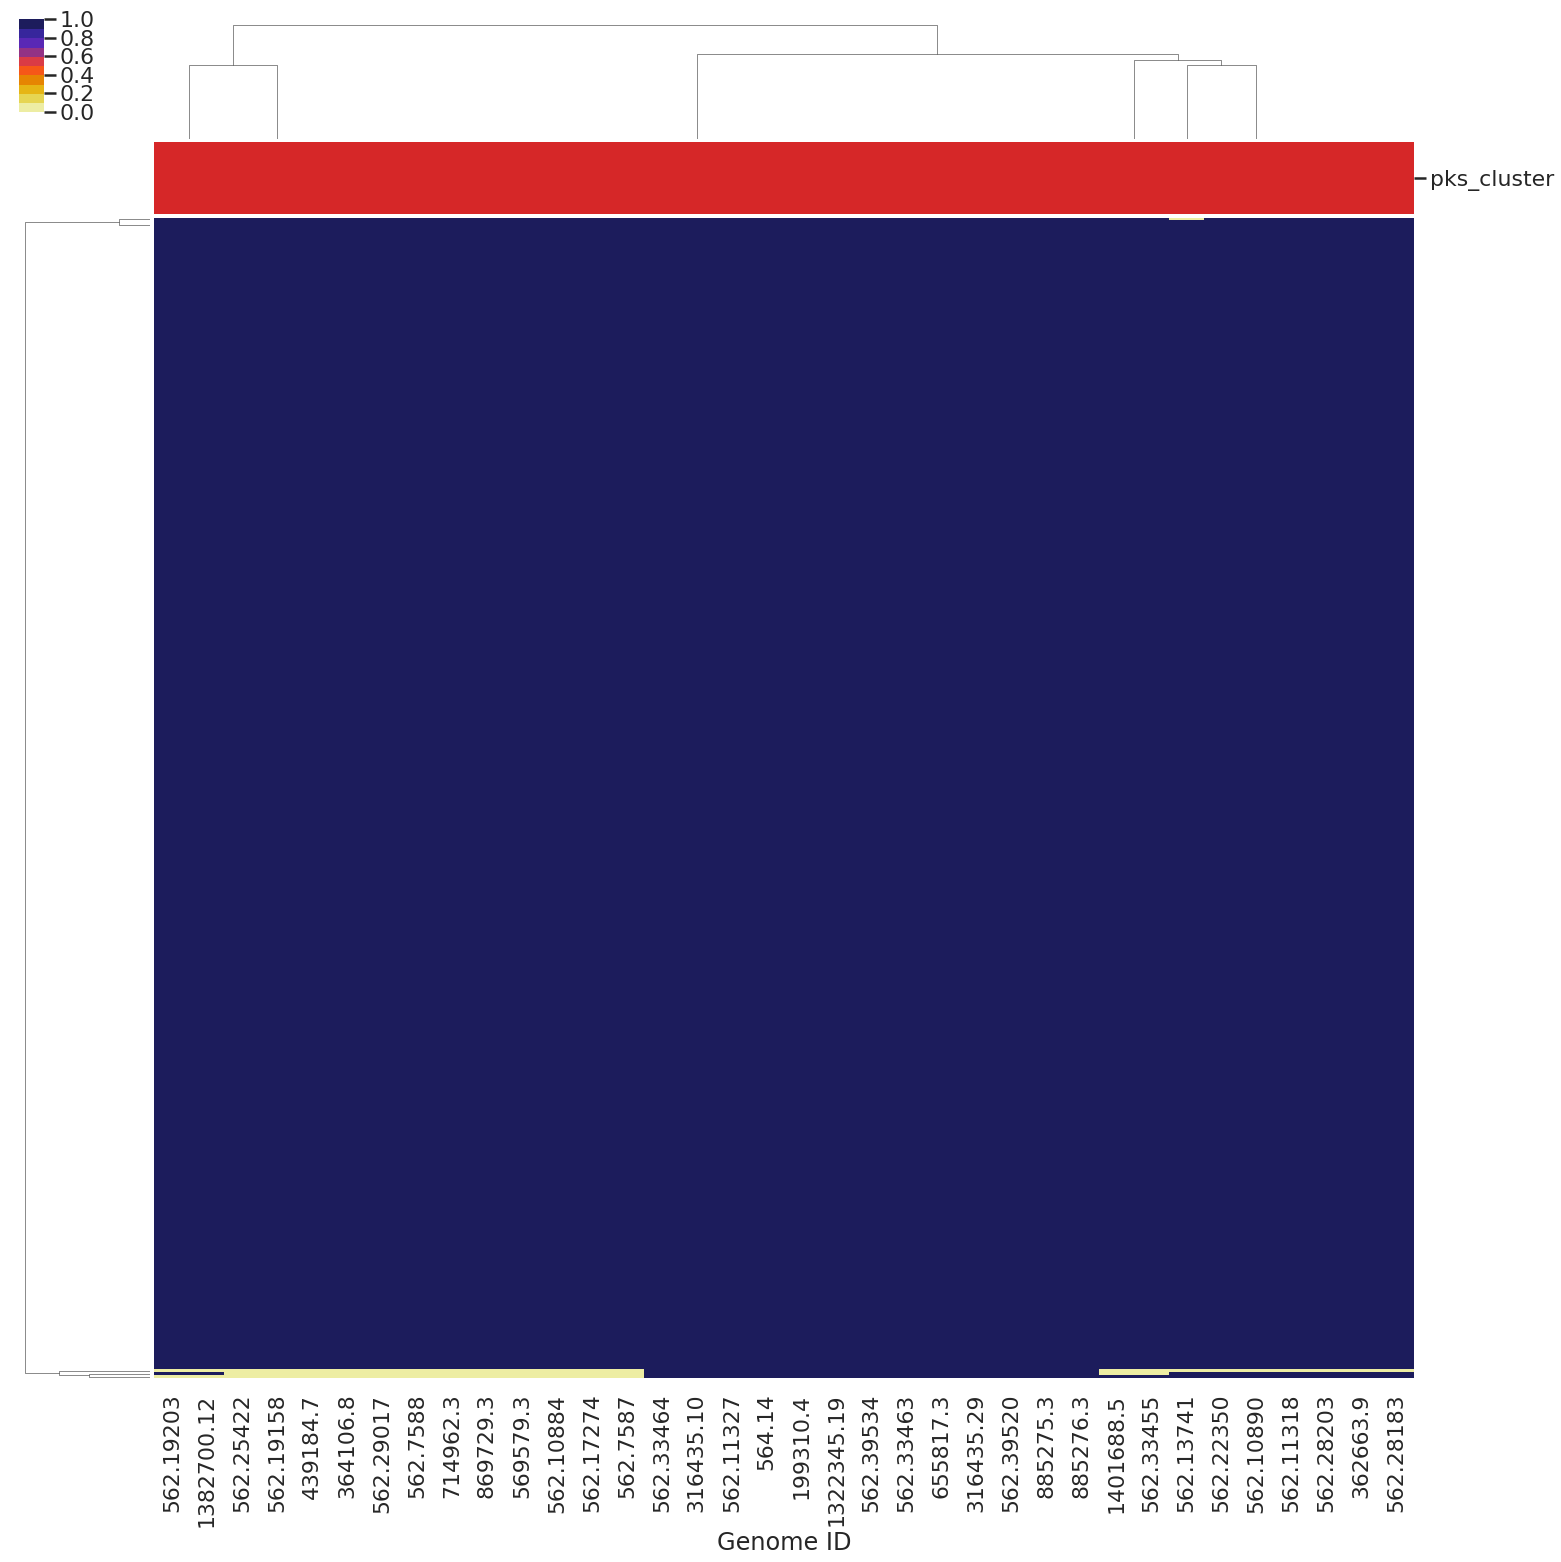

In [23]:
df_homolog = df_homolog[df_homolog.columns].astype(float)
df_homolog_bool = df_homolog > 80
df_homolog_bool = df_homolog_bool * 1
df_homolog_bool = df_homolog_bool[df_homolog_bool.columns].astype(float)
df_homolog_reduced = df_homolog_bool[df_homolog_bool.sum(axis=1) < 0.95 * len(df_homolog_bool.columns)]

df_homolog_reduced = df_homolog_reduced[df_homolog_reduced.sum(axis=1) > 0 * len(df_homolog_bool.columns)]


col_colors = df_tgt['pks_cluster'].map(cluster_color_palette)

reorder_columns = []
# cluster_list = df_tgt.pks_cluster.unique()
cluster_list = ['No_pks', 'PKS_distant', 'Ybt', 'Clb']

for cluster in cluster_list:
    cluster_block_ids = df_tgt[df_tgt.pks_cluster == cluster].index
    df_cluster_block = df_homolog_reduced.loc[:,cluster_block_ids]
    r_block = sns.clustermap(df_cluster_block, cmap=sns.color_palette("CMRmap_r",10), col_cluster=True, 
                             row_cluster=True, col_colors=col_colors,linewidths=0, yticklabels=False, figsize=(25,25))

    reorder_columns = reorder_columns + r_block.data2d.columns.tolist()

In [24]:
cluster_list = ['No_pks', 'PKS_distant', 'Ybt', 'Clb']

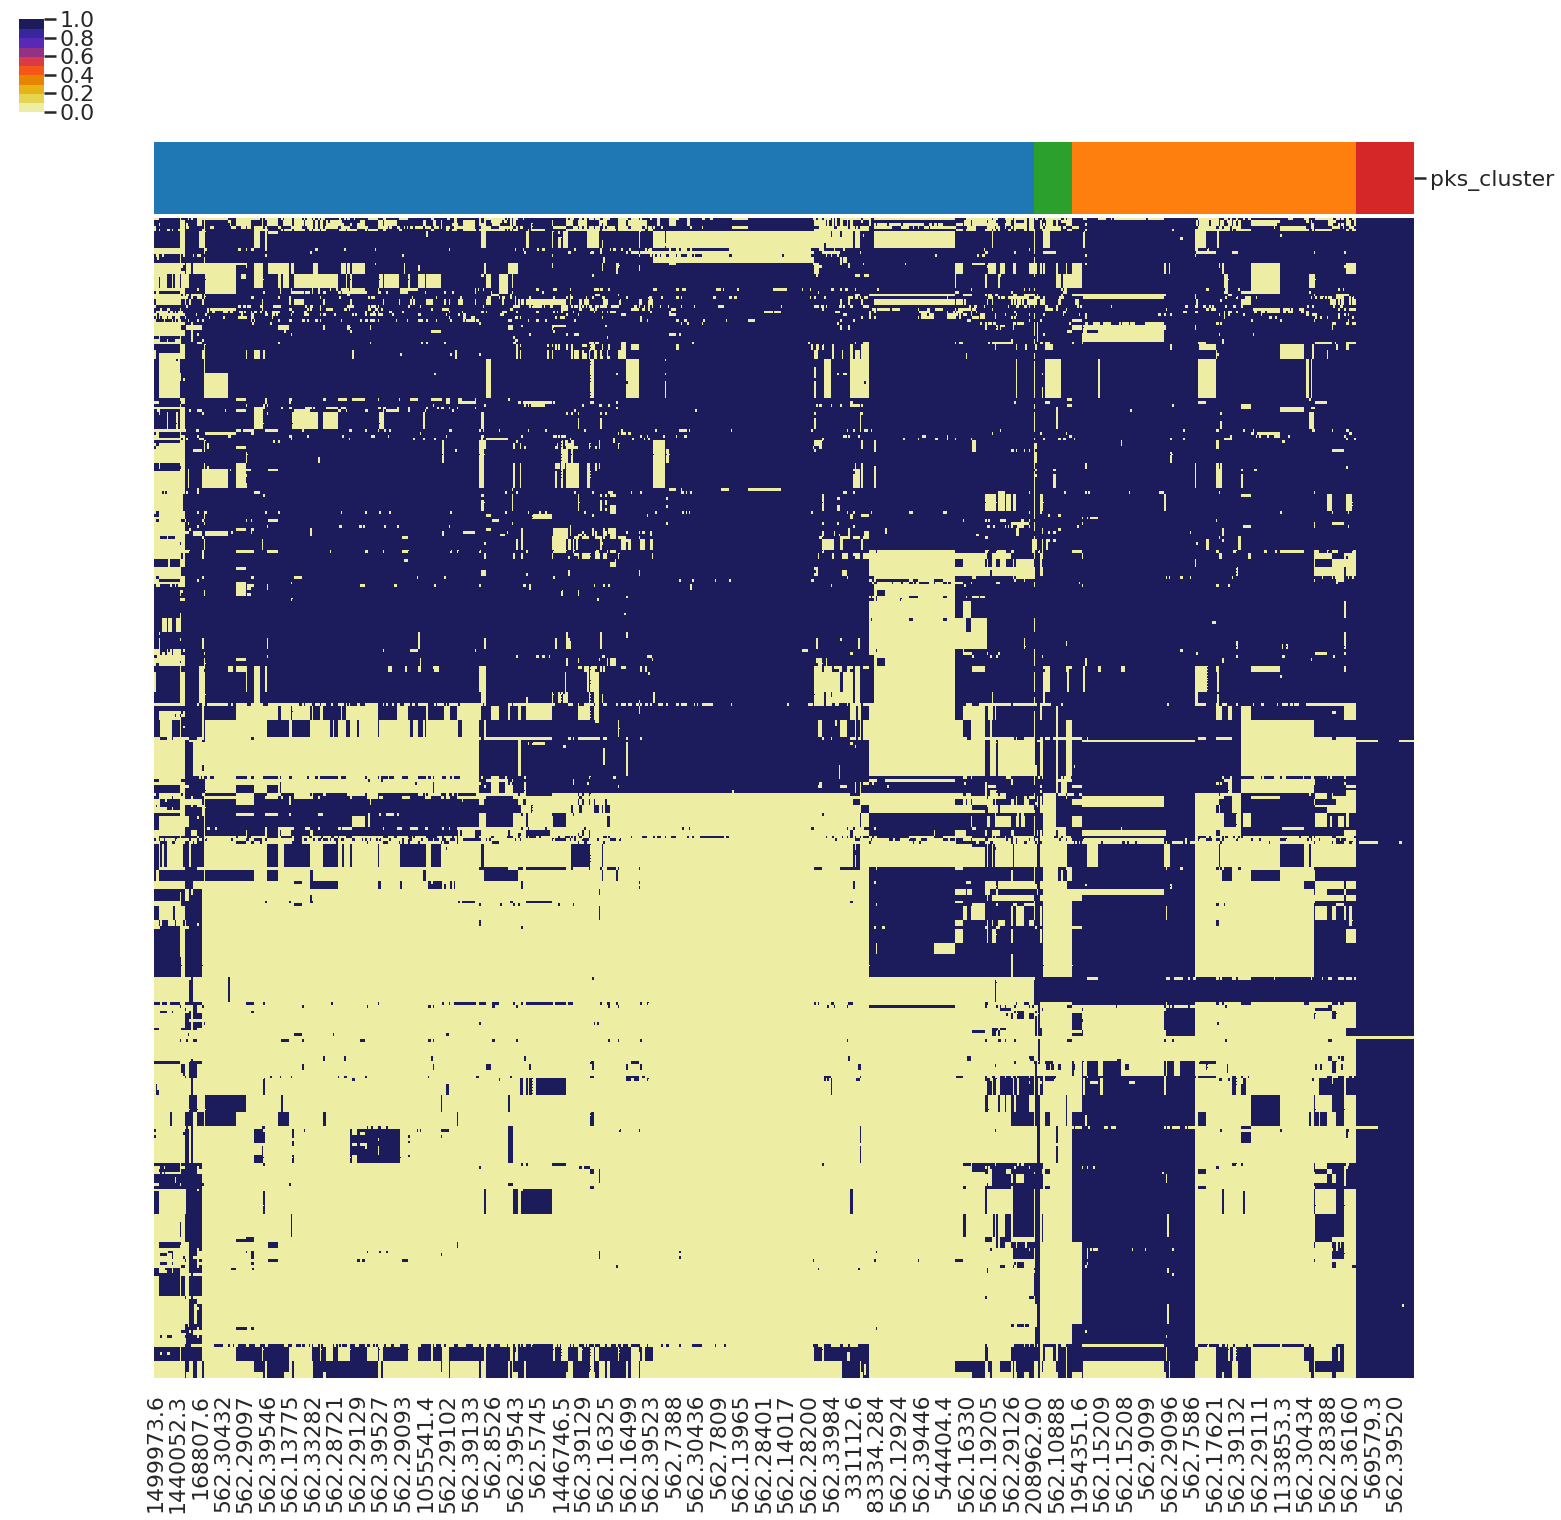

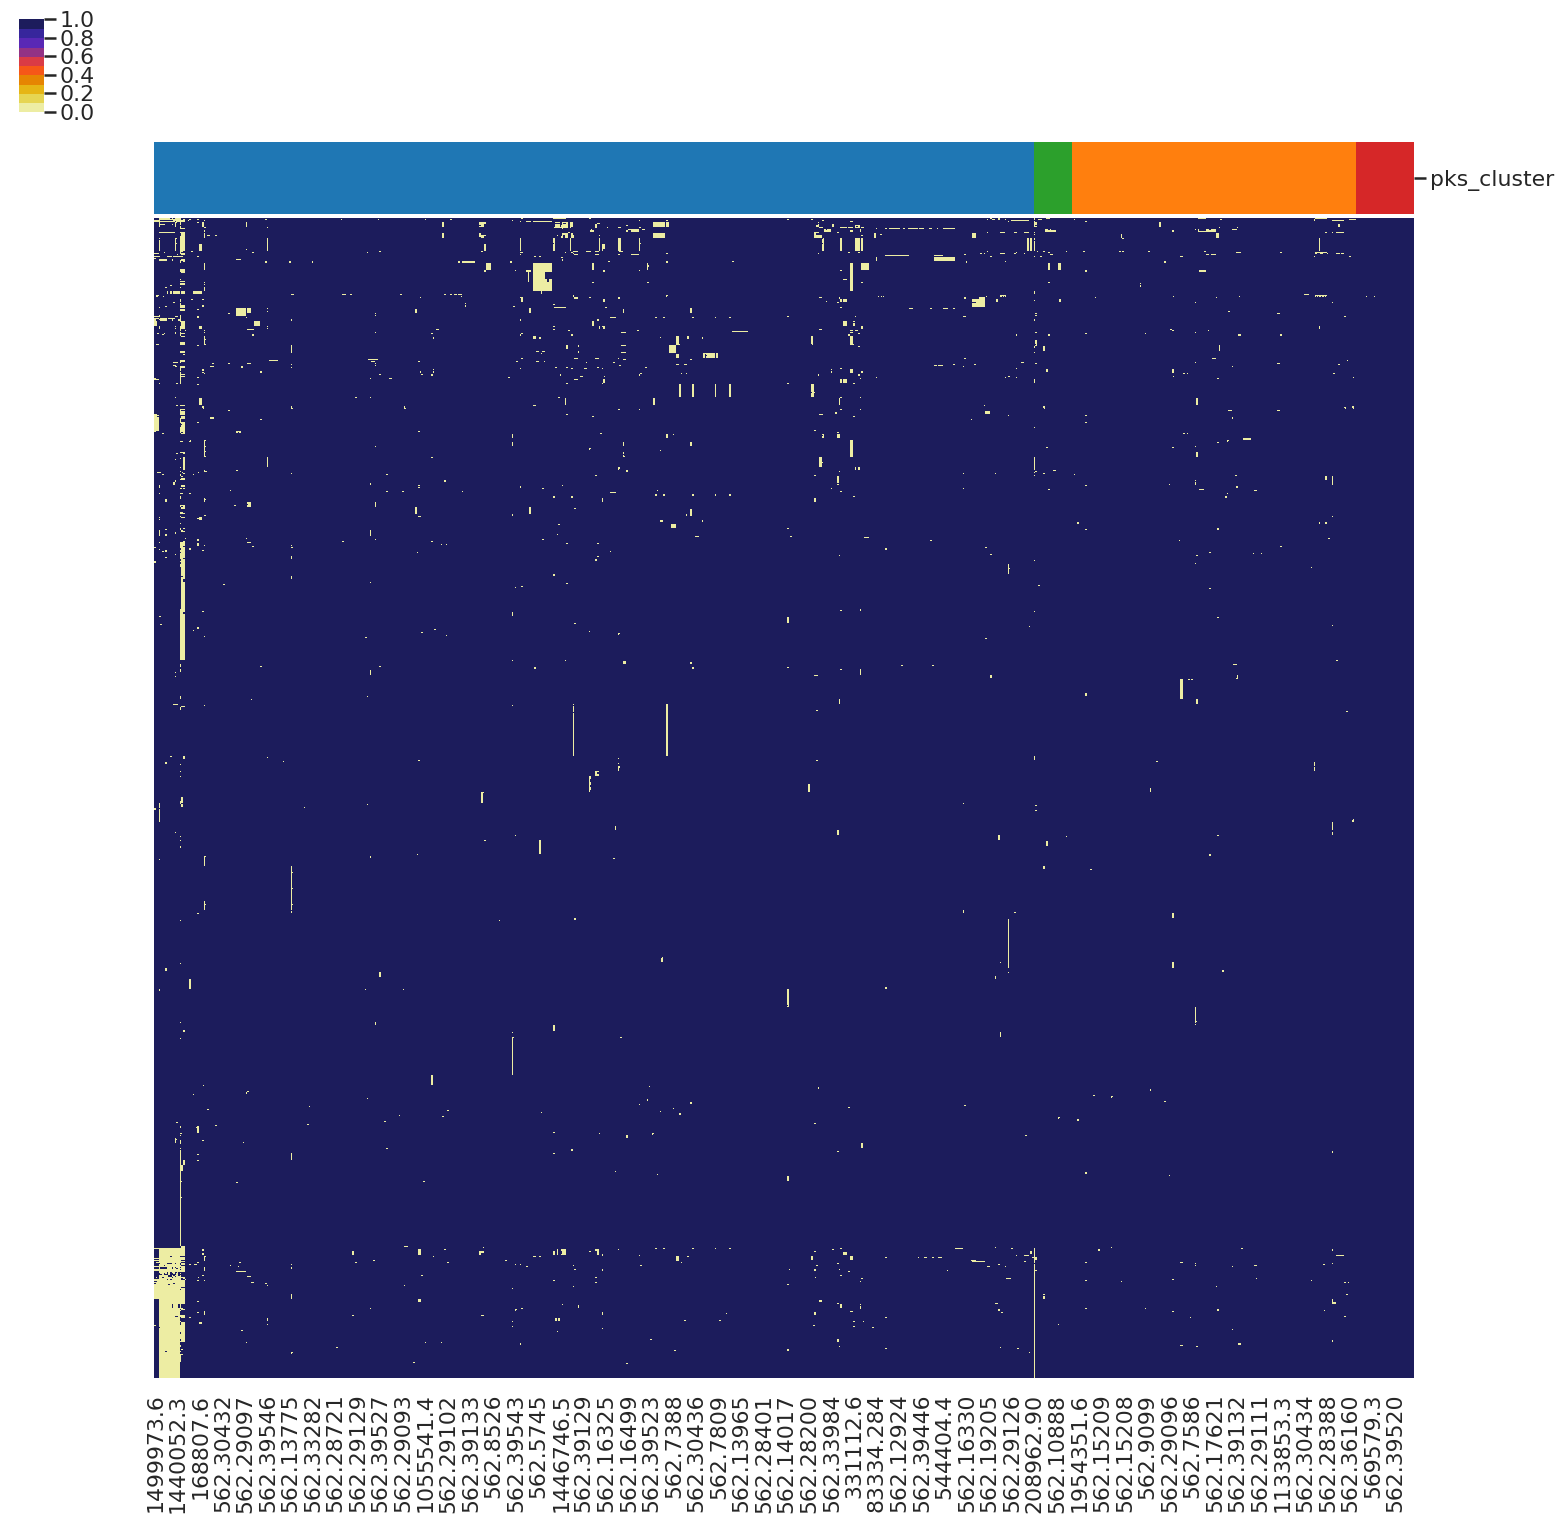

In [25]:
df_homolog_reduced = df_homolog_bool[df_homolog_bool.sum(axis=1) < 0.95 * len(df_homolog_bool.columns)]

df_homolog_shell = df_homolog_bool[(df_homolog_bool.sum(axis=1) >= 0.95 * len(df_homolog_bool.columns)) & (df_homolog_bool.sum(axis=1) < 1 * len(df_homolog_bool.columns))]


df_homolog_reduced_ordered = df_homolog_reduced.loc[:,reorder_columns]
r = sns.clustermap(df_homolog_reduced_ordered, cmap=sns.color_palette("CMRmap_r",10), col_cluster=False, 
                   row_cluster=True, col_colors=col_colors, 
              linewidths=0, yticklabels=False, figsize = (25,25))

r.ax_row_dendrogram.set_visible(False)
r.ax_col_dendrogram.set_visible(False)

df_homolog_shell_ordered = df_homolog_shell.loc[:,reorder_columns]
r2 = sns.clustermap(df_homolog_shell_ordered, cmap=sns.color_palette("CMRmap_r",10), col_cluster=False, 
                   row_cluster=True, col_colors=col_colors, 
              linewidths=0, yticklabels=False, figsize = (25,25))

r2.ax_row_dendrogram.set_visible(False)
r2.ax_col_dendrogram.set_visible(False)

non_core_genes = r.data2d.index.tolist()
core_genes = df_homolog_bool[df_homolog_bool.sum(axis=1) == 1 * len(df_homolog_bool.columns)].index.tolist()
shell_genes = r2.data2d.index.tolist()
final_genes = core_genes + shell_genes + non_core_genes

In [28]:
df_asso_genes = pd.read_csv('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/asso_gene_families.csv', index_col= 'Unnamed: 0')

In [29]:
# Round of the genome contents
for gene_id in df_asso_genes.index:
    df_asso_genes.loc[gene_id, 'clb_genomes'] = round(df_asso_genes.loc[gene_id, 'clb_genomes'],2)
    df_asso_genes.loc[gene_id, 'ybt_genomes'] = round(df_asso_genes.loc[gene_id, 'ybt_genomes'],2)
    df_asso_genes.loc[gene_id, 'PKS_distant'] = round(df_asso_genes.loc[gene_id,'PKS_distant'],2)
    df_asso_genes.loc[gene_id, 'no_pks_genomes'] = round(df_asso_genes.loc[gene_id, 'no_pks_genomes'],2)
df_asso_genes    

,region_number,clb_genomes,ybt_genomes,PKS_distant,no_pks_genomes,pan_gene_id,product,refseq_locus_tag,alt_locus_tag,uniprotkb_accession,gene,figfam_id,plfam_id,pgfam_id,go,ec,pathway,pan_pat_id
fig|1322345.19.peg.265|DR76_253,1,1,0.41,0.12,0.03,yfcQ,Minor fimbrial subunit StfF,c2880,VBIEscCol75197_2717,Q8CVV1,yfcQ,FIG00002016,PLF_561_00005092,PGF_00021466,NaN,NaN,NaN,fig|1322345.19.peg.265|DR76_253
fig|1322345.19.peg.266|DR76_254,1,1,0.12,0.08,0.03,yfcR,Minor fimbrial subunit StfE,c2881,VBIEscCol75197_2718,Q8CVV0,yfcR,FIG01290804,PLF_561_00004408,PGF_00021465,NaN,NaN,NaN,fig|1322345.19.peg.266|DR76_254
fig|1322345.19.peg.267|DR76_255,1,1,0.44,0.12,0.05,yfcS,Periplasmic fimbrial chaperone StfD,c2882,VBIEscCol75197_2719,Q8CVU9,yfcS,FIG00007476,PLF_561_00005169,PGF_00031006,NaN,NaN,NaN,fig|1322345.19.peg.267|DR76_255
fig|1322345.19.peg.268|DR76_256,1,1,0.44,0.12,0.05,yfcU,Fimbriae usher protein StfC,c2883,VBIEscCol75197_2720,Q8FFG6,yfcU,FIG00011116,PLF_561_00005090,PGF_04276033,NaN,NaN,NaN,fig|1322345.19.peg.268|DR76_256
fig|1322345.19.peg.269|DR76_257,1,1,0.44,0.12,0.04,yfcV,Major fimbrial subunit StfA,c2884,VBIEscCol75197_2721,Q8CVU8,yfcV,FIG00009029,PLF_561_00004724,PGF_00018897,NaN,NaN,NaN,fig|1322345.19.peg.269|DR76_257
fig|1322345.19.peg.410|DR76_398,0,1,0.57,0.29,0.07,yfgJ,Uncharacterized protein YfgJ,c3032,VBIEscCol75197_2863,Q8FF60,yfgJ,FIG00553339,PLF_561_00003257,PGF_00065556,NaN,NaN,NaN,fig|1322345.19.peg.410|DR76_398
fig|1322345.19.peg.516|DR76_506,2,1,0.16,0.04,0.03,group_12635,hypothetical protein,c4897,VBIEscCol75197_4598,Q8FBB2,NaN,FIG00904518,PLF_561_00004682,PGF_08225224,NaN,NaN,NaN,fig|1322345.19.peg.516|DR76_506
fig|1322345.19.peg.519|DR76_509,2,1,0.16,0.08,0.03,tsx2,Nucleoside-specific channel-forming protein Ts...,c4894,VBIEscCol75197_4595,Q8CVJ2,NaN,FIG00554756,PLF_561_00005630,PGF_03376111,NaN,NaN,NaN,fig|1322345.19.peg.519|DR76_509
fig|1322345.19.peg.636|DR76_625,3,1,0.47,0.12,0.09,group_5002,hypothetical protein,NaN,VBIEscCol75197_4477,NaN,NaN,FIG01334895,PLF_561_00194134,PGF_12741711,NaN,NaN,NaN,fig|1322345.19.peg.636|DR76_625
fig|1322345.19.peg.637|DR76_626,3,1,0.48,0.12,0.10,rutB_2,Isochorismatase (EC 3.3.2.1),c4769,VBIEscCol75197_4476,Q8FBK3,NaN,FIG00009017,PLF_561_00004986,PGF_06938364,GO:0008908|isochorismatase activity,3.3.2.1|Isochorismatase,01053|Biosynthesis of siderophore group nonrib...,fig|1322345.19.peg.637|DR76_626


In [30]:
df_genome_cnt = get_genome_cnt_pks_type(df_homolog_bool, df_tgt)
# df_asso_genes = get_associated_genes(1, 1, 1, 0.1, df_genome_cnt, df_pan_features)

In [14]:
df_asso_genes.set_index('Unnamed: 0', inplace=True)

In [ ]:
df_homolog_plot.to_csv('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_asso_pid_dist.csv')

In [31]:
region_color_palette = dict(zip(df_asso_genes.region_number.unique(), sns.color_palette("cubehelix_r", len(df_asso_genes.region_number.unique()))[1:]))

row_colors = df_asso_genes.region_number.map(region_color_palette)

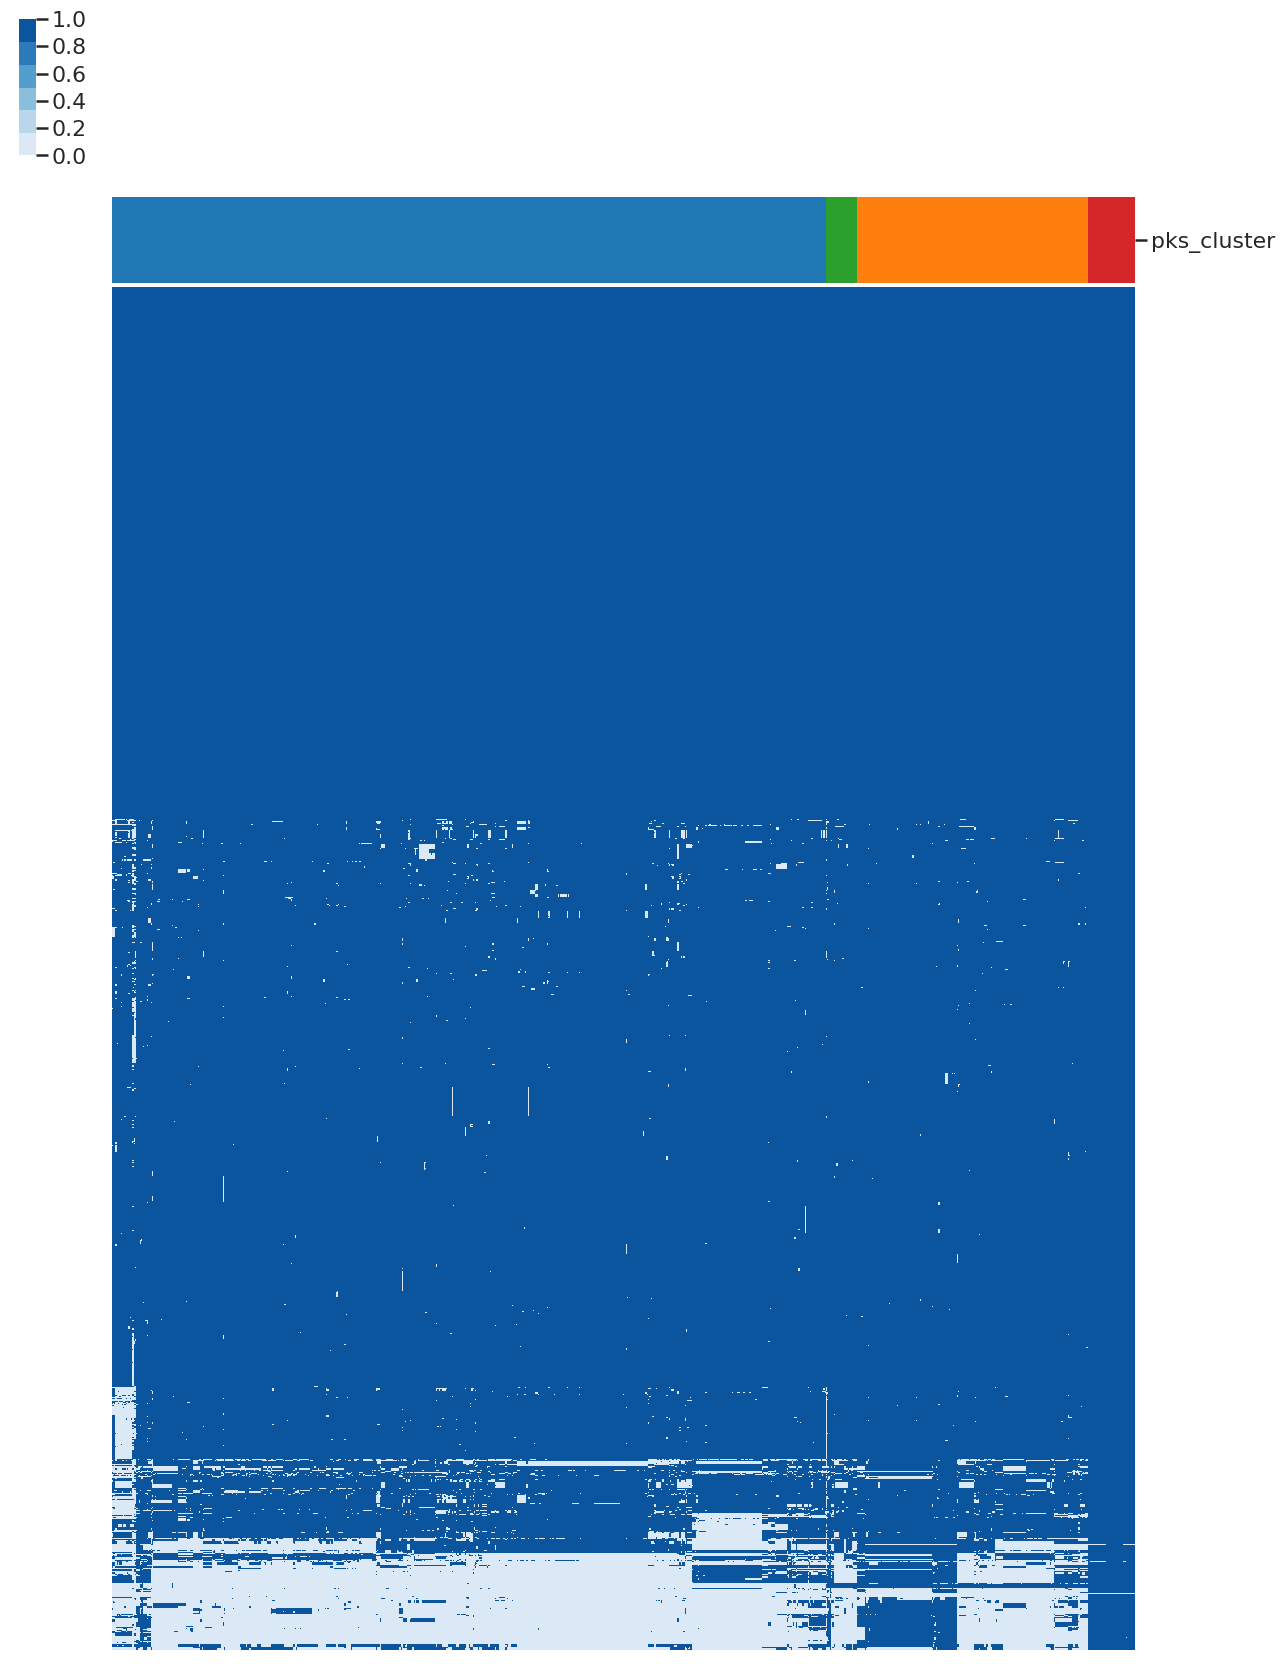

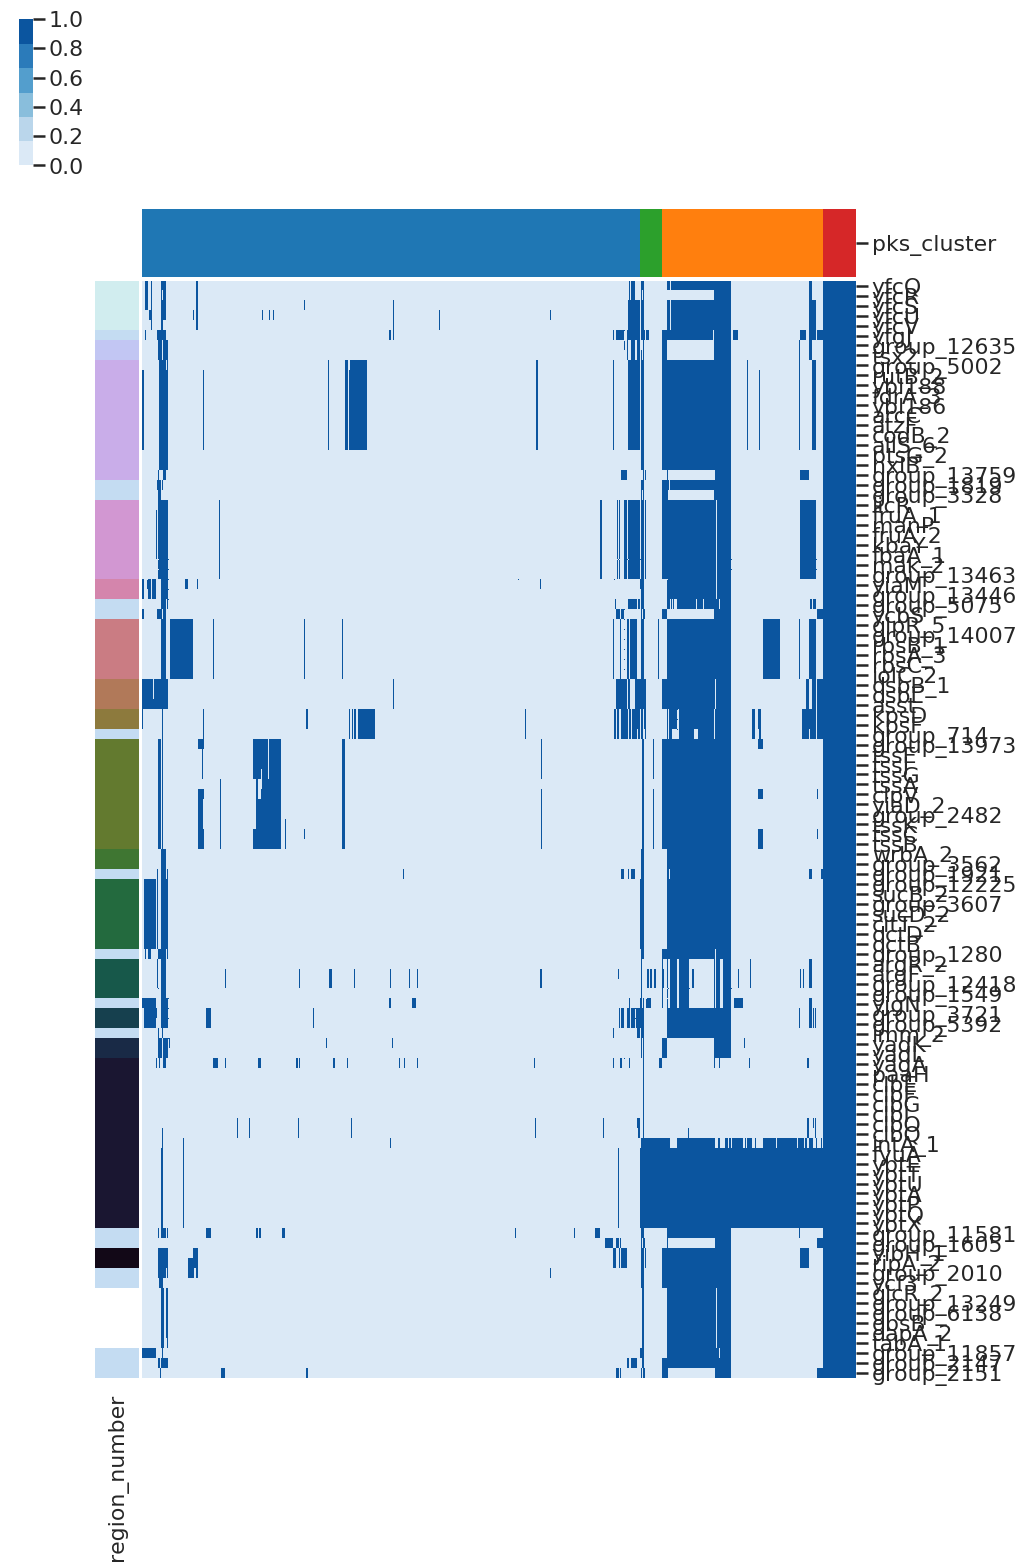

In [32]:
# print(len(core_genes), len(shell_genes), len(non_core_genes))

df_homolog_all = df_homolog_bool.loc[final_genes, reorder_columns]
sns.clustermap(df_homolog_all, cmap=sns.color_palette("Blues"), col_colors=col_colors, col_cluster=False, 
                             row_cluster=False,linewidths=0, yticklabels=False, xticklabels=False,figsize = (20,30))
df_homolog_plot = df_homolog_bool.loc[df_asso_genes.index,reorder_columns]
sns.clustermap(df_homolog_plot, cmap=sns.color_palette("Blues"), col_cluster=False, row_cluster=False,  
              linewidths=0, yticklabels=df_asso_genes.pan_gene_id, figsize= (15,25), col_colors=col_colors, row_colors = row_colors, xticklabels= False)



In [ ]:
df_tgt_map = pd.read_pickle('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_tgt_map.p')

df_tgt = pd.read_pickle('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_tgt.p')


In [ ]:
df_asso_features = df_pan_features[df_pan_features.pan_pat_id.isin(df_asso_genes.index)]
pan_id_gene_name_dict = dict(zip(df_asso_features.pan_pat_id, df_asso_features.pan_gene_id))
pan_id_gene_name_dict['fig|1322345.19.peg.2892|DR76_2818'] = ''

In [ ]:
df_homolog_plot_pid = df_homolog.loc[df_homolog_plot.index,:]

yticknames = [pan_id_gene_name_dict[gene_idx] for gene_idx in df_homolog_plot_pid.index]

reorder_columns = []
cluster_list = df_tgt_map.pks_cluster.unique()

for cluster in cluster_list:
    cluster_block_ids = df_tgt_map[df_tgt_map.pks_cluster == cluster].index
    df_cluster_block = df_homolog_plot_pid.loc[:,cluster_block_ids]
    r_block = sns.clustermap(df_cluster_block, cmap=sns.color_palette("CMRmap_r",10), col_cluster=True, row_cluster=True, col_colors=col_colors, 
              linewidths=0, yticklabels=False)
    reorder_columns = reorder_columns + r_block.data2d.columns.tolist()

df_homolog_plot_pid_ordered = df_homolog_plot_pid.loc[:,reorder_columns]

r3 = sns.clustermap(df_homolog_plot_pid_ordered, cmap=sns.color_palette("BuPu",10), col_cluster=False, row_cluster=False,  
              linewidths=0, figsize= (20,50), col_colors=col_colors, xticklabels= False, yticklabels=yticknames)

# df_tgt_subnet_T = df_tgt_subnet.T
# df_tgt_subnet_T = df_tgt_subnet_T.loc[:,r3.data2d.columns.tolist()]

# r4 = sns.clustermap(df_tgt_subnet_T, cmap = 'tab20_r', col_cluster=False, figsize= (20,4))

In [ ]:
df_homolog = df_homolog[df_homolog.columns].astype(float)
# cluster_gene_idx = df_homolog_plot.index

# cluster_gene_idx = ['fig|1322345.19.peg.3502|DR76_3396','fig|1322345.19.peg.3501|DR76_3395']
cluster_gene_idx = ['fig|1322345.19.peg.1866|DR76_1814',
'fig|1322345.19.peg.1864|DR76_1812',
'fig|1322345.19.peg.1863|DR76_1811',
'fig|1322345.19.peg.1862|DR76_1810',
'fig|1322345.19.peg.1861|DR76_1809',
'fig|1322345.19.peg.1850|DR76_1798',
'fig|1322345.19.peg.1849|DR76_1797',
'fig|1322345.19.peg.1848|DR76_1796',
'fig|1322345.19.peg.1847|DR76_1795',
'fig|1322345.19.peg.1846|DR76_1794',
'fig|1322345.19.peg.1845|DR76_1793']
# PTS System
# cluster_gene_idx = ['fig|1322345.19.peg.843|DR76_833', 
# 'fig|1322345.19.peg.838|DR76_828',
# 'fig|1322345.19.peg.837|DR76_827',
# 'fig|1322345.19.peg.836|DR76_826']
# row_names = []
# # Fimbrial / chaperone
# cluster_gene_idx = ['fig|1322345.19.peg.264|DR76_252',
# 'fig|1322345.19.peg.265|DR76_253',
# 'fig|1322345.19.peg.266|DR76_254',
# 'fig|1322345.19.peg.269|DR76_257']
# 'fig|1322345.19.peg.1095|DR76_1073',
# 'fig|1322345.19.peg.1093|DR76_1071',
# 'fig|1322345.19.peg.2726|DR76_2653',
# 'fig|1322345.19.peg.2727|DR76_2654']
# row_names = ['YfcP', 'YfcQ', 'YfcR', 'YfcV']
reorder_columns = r3.data2d.columns
df_homolog_percent_reduced = df_homolog.loc[cluster_gene_idx, reorder_columns]
r = sns.clustermap(df_homolog_percent_reduced, cmap=sns.color_palette("BuPu",10), col_cluster=False, row_cluster=False, col_colors=col_colors, 
              linewidths=0, figsize = (20,5), xticklabels =False)
# df_homolog_percent_reduced

In [ ]:
df_interpro.columns = []
# df_asso_interpro_all = df_interpro[df_interpro[0].isin(df_asso_genes.index)]
# df_asso_interpro_all.fillna('0',inplace=True)
# df_asso_interpro_pfam = df_asso_interpro_all[df_asso_interpro_all[3] == 'Pfam']
# df_asso_interpro_superfamily = df_asso_interpro_all[df_asso_interpro_all[3] == 'SUPERFAMILY']
# df_asso_interpro_panther = df_asso_interpro_all[df_asso_interpro_all[3] == 'PANTHER']
# df_asso_interpro_Gene3D = df_asso_interpro_all[df_asso_interpro_all[3] == 'Gene3D']
# df_asso_interpro_CDD = df_asso_interpro_all[df_asso_interpro_all[3] == 'CDD']
# df_asso_interpro_pathway = df_asso_interpro_pfam[(df_asso_interpro_pfam[14] != '0') | (df_asso_interpro_pfam[13] != '0')]

# df_asso_interpro_pfam.sort_values(by=[4,14,13,2], ascending=False)
# df_genome_cnt = get_genome_cnt_pks_type(df_homolog_bool, df_tgt_map)
# df_asso_genes = get_associated_genes(0.85, 1, 0.1, df_genome_cnt, df_pan_features)
# clb_genomes = df_tgt_map[df_tgt_map.pks_cluster == 'Clb'].index
# df_homolog_bool.loc[:,clb_genomes].sum(1)
# df_asso_genes


# df_asso_interpro_all.set_index([0,2,3],inplace=True)
# with pd.ExcelWriter(os.path.join(homology_out_dir, 'df_asso_genes_interpro_all.xlsx')) as writer:
#         df_asso_interpro_all.to_excel(writer, sheet_name='gene_KO')
        
# with pd.ExcelWriter(os.path.join(homology_out_dir, 'df_asso_genes_interpro_pfam.xlsx')) as writer:
#         df_asso_interpro_pfam.to_excel(writer, sheet_name='gene_KO')

# df_asso_interpro_all.to_csv('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_asso_genes_interpro.csv')
# df_asso_interpro_pfam.to_csv('/home/omkar/Projects/panGenome/data/entero_project/homology/pan_clb_vs_Escherichia/df_asso_genes_interpro_pfam.csv')

In [ ]:
pat0 = imp_genome_ids[0]
pat2 = imp_genome_ids[2]
pat3 = imp_genome_ids[3]


df_genome_roary = df_roary_bool[(df_roary_bool[pat2] == 0) & (df_roary_bool[pat3] == 0)]
genomes_cnt = df_genome_roary.sum(axis=1)
unique_genes = genomes_cnt[genomes_cnt == 1]
# genomes_cnt
# df_genome_roary.loc[unique_genes.index,:]
print(len(unique_genes))
df_genome_roary = df_genome_roary[df_genome_roary.columns].astype(float)
df_genome_roary = df_genome_roary[df_genome_roary.sum(axis=1) > 1] # 0.5 * len(df_genome_roary.columns)]

strain_id_dict = dict(zip(df_tgt_map.index.tolist(), df_tgt_map.Strain.tolist()))
df_genome_roary.columns = [strain_id_dict[pat_id] for pat_id in df_genome_roary.columns.tolist()]

sns.clustermap(df_genome_roary, cmap=sns.color_palette("CMRmap_r",10), col_cluster=True, row_cluster=True,
              linewidths=0, yticklabels=False)
df_genome_roary

In [ ]:
tmp_genes = df_pan_features[df_pan_features.pan_gene_id.isin(df_genome_roary.index.get_level_values(0))].index
# df_asso_genes[df_asso_genes.pan_pat_id.isin(tmp_genes)]
df_asso_genes[df_asso_genes.pan_gene_id.isin(df_genome_roary.index.get_level_values(0))]
tmp_genes

In [ ]:
# df_homolog_cluster, df_cluster_genes_updated  = plot_cluster_genes_against(df_homolog_bool,df_cluster_genes,df_pan_features)


# reorder_columns = []
# cluster_list = df_tgt_map.pks_cluster.unique()

# for cluster in cluster_list:
#     cluster_block_ids = df_tgt_map[df_tgt_map.pks_cluster == cluster].index
#     df_cluster_block = df_homolog_cluster.loc[:,cluster_block_ids]
#     r_block = sns.clustermap(df_cluster_block, cmap=sns.color_palette("CMRmap_r",10), col_cluster=True, row_cluster=True, col_colors=col_colors, 
#               linewidths=0, yticklabels=False)
#     reorder_columns = reorder_columns + r_block.data2d.columns.tolist()

# df_homolog_cluster_ordered = df_homolog_cluster.loc[:,reorder_columns]

# for genome_id in df_tgt_map.index:
#     pks_clust = df_tgt_map.loc[genome_id, 'pks_cluster']
#     if pks_clust == 'Clb':
#         df_tgt_subnet.loc[genome_id, '3'] = 18
#     elif pks_clust == 'Ybt':
#         df_tgt_subnet.loc[genome_id, '3'] = 20
#     elif df_tgt_subnet.loc[genome_id, '3'] == 4:
#         df_tgt_subnet.loc[genome_id, '3'] = 16
    
# update_columns = ['2_nrps','1_thiopeptide','3_pks_nrps','8_bacteriocin','4_arylpolyene','41_bacteriocin',
#                   '292_bacteriocin','singleton','122_bacteriocin','178_bacterioicin','90_phenazine',
#                   '287_bacteriocin','62_bacteriocin']

# df_tgt_subnet.columns = update_columns

r1 = sns.clustermap(df_cluster_genes_updated, cmap = 'Blues', figsize= (4,10), yticklabels=False)

df_homolog_cluster_ordered = df_homolog_cluster_ordered.loc[r1.data2d.index.tolist(),:]
r2 = sns.clustermap(df_homolog_cluster_ordered, cmap=sns.color_palette("CMRmap_r",10), col_cluster=False, row_cluster=False, 
              linewidths=0, xticklabels=False, figsize= (20,10))
r2.cax.set_visible(False)
df_tgt_subnet_T = df_tgt_subnet.T
df_tgt_subnet_T = df_tgt_subnet_T.loc[:,r2.data2d.columns.tolist()]

r3 = sns.clustermap(df_tgt_subnet_T, cmap = 'tab20_r', col_cluster=False, figsize= (20,4))


# r1.ax_heatmap.set_position([0.0, 0, 0.5, 0.5])
# r2.ax_heatmap.set_position([0.3, 0.3, 0.5, 0.5])
# r3.ax_heatmap.set_position([0.3, 0.1, 0.5, 0.5])

r1.cax.set_visible(False)
r2.cax.set_visible(False)
r3.cax.set_visible(False)

r1.ax_row_dendrogram.set_visible(False)
r1.ax_col_dendrogram.set_visible(False)

r3.ax_row_dendrogram.set_visible(False)

In [2]:
import pandas as pd
import os
from shutil import copyfile
from Bio import SeqIO
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def plot_cluster_genes_against(df_homolog_bool,df_cluster_genes,df_pan_features):
    updated_index = [orig_idx.split('|DR')[0] for orig_idx in df_homolog_bool.index.tolist()]
    df_homolog_updated = df_homolog_bool.copy()
    df_homolog_updated.index = updated_index
    
    cft_pan_dict = dict()
    
    for cft_gene_id in df_cluster_genes.index:
        pan_gene_id = df_pan_features.loc[cft_gene_id,'pan_pat_id']
        cft_pan_dict[cft_gene_id] = pan_gene_id
    
    df_homolog_cluster = pd.DataFrame(columns=df_homolog_updated.columns)
    for cft_gene_id in cft_pan_dict.keys():
        pan_gene_id = cft_pan_dict[cft_gene_id]
        if pan_gene_id in df_homolog_updated.index:
            df_homolog_cluster.loc[cft_gene_id,:] = df_homolog_updated.loc[pan_gene_id,:]
    
    df_cluster_genes_updated = df_cluster_genes.loc[df_homolog_cluster.index,:]
    return df_homolog_cluster, df_cluster_genes_updated
    
def get_cluster_genes(data_dir, genome_id, gene_cluster_id, df_pan_features):
    gene_cluster_path = os.path.join(data_dir, genome_id, 'as5', gene_cluster_id + '.gbk')
    
    df_cluster_genes = pd.DataFrame(columns=['biosynthetic', 'biosynthetic-additional','transport','regulatory','resistance','other'])
    
    for record in SeqIO.parse(gene_cluster_path, "genbank"):
        for feature in record.features:
                if feature.type == 'CDS':
                    gene_id = feature.qualifiers['ID'][0]
                    product = feature.qualifiers['product'][0]
                    if 'gene_functions' in feature.qualifiers.keys():
                        gene_function_list = feature.qualifiers['gene_functions']
                        for gene_fun in gene_function_list:
                            gene_type = gene_fun.split(' ')[0]
                            df_cluster_genes.loc[gene_id, gene_type] = 1
                    else:
                        df_cluster_genes.loc[gene_id, 'Other'] = 1
                    
#                     if gene_id in df_pan_features.index:
                        
#                         df_cluster_genes.loc[gene_id, 'product'] =  
#                     else:
#                         print(gene_id, 'not in df_pan_features')
    df_cluster_genes = df_cluster_genes.fillna(0)        
    return df_cluster_genes
    
# def get_genes_biosynthesis():
    
def update_cluster_asso_genes(df_cluster_genes, df_asso_genes):
    for tmp_id in df_asso_genes.index:
        gene_id = df_asso_genes.loc[tmp_id, 'gene_ref_id']
        if gene_id in df_cluster_genes.index:
            print(gene_id)
            for col in df_cluster_genes.columns:
                df_asso_genes.loc[tmp_id,col] = df_cluster_genes.loc[gene_id,col]
                
    df_asso_genes =  df_asso_genes.fillna(0) 
    return df_asso_genes
# def get_kegg_data():
    
# def update_kegg_asso_genes():
    
# def get_asso_gene_all_features():
    
def get_associated_genes(clb_min, ybt_max, pks_distant_max, no_pks_max, df_genome_cnt, df_pan_features):
    df_asso_genes = df_genome_cnt[(df_genome_cnt.clb_genomes >= clb_min) & (df_genome_cnt.ybt_genomes <= ybt_max)
                                  & (df_genome_cnt.PKS_distant <= pks_distant_max)
                                  & (df_genome_cnt.no_pks_genomes <= no_pks_max)]
    
    for gene_id in df_asso_genes.index:
        df_pan_tmp = df_pan_features[df_pan_features.pan_pat_id == gene_id]
#         df_asso_genes.loc[gene_id,'gene_ref_id'] = df_pan_tmp.index.tolist()[0]
        for col in df_pan_tmp.columns:
            for row in df_pan_tmp.index:
                df_asso_genes.loc[gene_id,col] = df_pan_tmp.loc[row,col]
            
    return df_asso_genes
  

# def get_genome_asso_genes(df_roary_bool, pat_id):
#     df_genome_roary = df_roary_bool[df_roary_bool[pat_id] == 1]
#     genomes_cnt = df_roary_bool.sum(axis=1)
#     unique_genes = df_genome_cnt[]
#     df_genome_specific_genes = df_genome_roary.loc[genomes_cnt,:]
#     . loc[:,pat_id]
#     df_genome_roary
#     nissle_only_genes = df_roary_bool[]
    
    

    
def get_genome_cnt_pks_type(df_homolog_bool, df_tgt_map):
    clb_genomes = df_tgt_map[df_tgt_map.pks_cluster == 'Clb'].index
    ybt_genomes = df_tgt_map[df_tgt_map.pks_cluster == 'Ybt'].index
    pks_distant_genomes = df_tgt_map[df_tgt_map.pks_cluster == 'PKS_distant'].index
    no_pks_genomes = df_tgt_map[df_tgt_map.pks_cluster == 'No_pks'].index
    
    clb_count = df_homolog_bool.loc[:,clb_genomes].sum(axis=1)
    ybt_count = df_homolog_bool.loc[:,ybt_genomes].sum(axis=1)
    pks_distant_count = df_homolog_bool.loc[:,pks_distant_genomes].sum(axis=1)
    no_pks_count = df_homolog_bool.loc[:,no_pks_genomes].sum(axis=1)
    
    df_genome_cnt = pd.DataFrame(index=df_homolog_bool.index)
    df_genome_cnt['clb_genomes'] = clb_count/len(clb_genomes)
    df_genome_cnt['ybt_genomes'] = ybt_count/len(ybt_genomes)
    df_genome_cnt['PKS_distant'] = pks_distant_count/len(pks_distant_genomes)
    df_genome_cnt['no_pks_genomes'] = no_pks_count/len(no_pks_genomes)
        
    df_genome_cnt = df_genome_cnt[df_genome_cnt.columns].astype(float)
    return df_genome_cnt    
    


def add_genome_features(df_tgt, df_fam1_genomes, df_fam2_genomes, df_fam3_genomes, mibig_id, mibig_id2):
    fam1_pats = df_fam1_genomes.index.tolist()
    fam2_pats = df_fam2_genomes.index.tolist()
    fam3_pats = df_fam3_genomes.index.tolist()
    
    for pat_id in df_tgt.index:
        if pat_id in fam1_pats:
            df_tgt.loc[pat_id, 'pks_cluster'] = 'Clb' 
        elif pat_id in fam2_pats:
            df_tgt.loc[pat_id, 'pks_cluster'] = 'Ybt'
        elif pat_id in fam3_pats:
            df_tgt.loc[pat_id, 'pks_cluster'] = 'PKS_distant'
        else:
            df_tgt.loc[pat_id, 'pks_cluster'] = 'No_pks'
        
    
    cluster_color_palette = dict(zip(df_tgt.pks_cluster.unique(), sns.color_palette("tab10", len(df_tgt.pks_cluster.unique()))))
    
    return df_tgt, cluster_color_palette

def get_homology_map(homology_out_dir):
    df_homolog = pd.read_pickle(os.path.join(homology_out_dir, 'homology_maps', 'homology_map_df.p'))
    
    return df_homolog

def get_fam_clusters(adj_mat_dir, subnet_id, mibig_id, tgt_genus, df_clusters, df_entero):
    df_input_dir = os.path.join(adj_mat_dir, subnet_id)
    df_adj_mat = pd.read_csv(df_input_dir)
    df_adj_mat = df_adj_mat.set_index(df_adj_mat.columns[0])
    df_adj_mat = df_adj_mat.iloc[:,2:-2]
    
    fam_clusters_list = []
    for col in df_adj_mat.columns:
        similarity = df_adj_mat.loc[mibig_id,col]
        if float(similarity) > 0.3:
            fam_clusters_list.append(col)
            
    idx = pd.IndexSlice

    if tgt_genus == 'all':
        df_fam_clusters = df_clusters.loc[idx[:,:,:,:,:,:,:,:,:,:,:,fam_clusters_list],:]
        fam_patric_ids = df_fam_clusters.index.get_level_values(4).tolist()
        fam_tgt_clusters = df_fam_clusters.index.get_level_values(11).tolist()
    else:
        df_fam_clusters = df_clusters.loc[idx[:,:,:,:,:,:,:,:,:,:,:,fam_clusters_list],:]
        df_fam_clusters = df_fam_clusters[df_fam_clusters.index.get_level_values(0) == tgt_genus]
        fam_patric_ids = df_fam_clusters.index.get_level_values(4).tolist()
        fam_tgt_clusters = df_fam_clusters.index.get_level_values(11).tolist()

    df_fam_genomes = df_entero.loc[fam_patric_ids,:]
    
    return fam_tgt_clusters, df_fam_clusters, df_fam_genomes 


def get_other_fam_clusters(adj_mat_dir, subnet_id, mibig_id1, mibig_id2, tgt_genus, df_clusters, df_entero):
    df_input_dir = os.path.join(adj_mat_dir, subnet_id)
    df_adj_mat = pd.read_csv(df_input_dir)
    df_adj_mat = df_adj_mat.set_index(df_adj_mat.columns[0])
    df_adj_mat = df_adj_mat.iloc[:,2:-2]
    
    fam_clusters_list = []
    for col in df_adj_mat.columns:
        similarity1 = df_adj_mat.loc[mibig_id1,col]
        similarity2 = df_adj_mat.loc[mibig_id2,col]
        
        if float(similarity1) > 0.3:
            pass
        elif float(similarity2) > 0.3:
            pass
        else:
            fam_clusters_list.append(col)
            
    idx = pd.IndexSlice

    if tgt_genus == 'all':
        df_fam_clusters = df_clusters.loc[idx[:,:,:,:,:,:,:,:,:,:,:,fam_clusters_list],:]
        fam_patric_ids = df_fam_clusters.index.get_level_values(4).tolist()
        fam_tgt_clusters = df_fam_clusters.index.get_level_values(11).tolist()
    else:
        df_fam_clusters = df_clusters.loc[idx[:,:,:,:,:,:,:,:,:,:,:,fam_clusters_list],:]
        df_fam_clusters = df_fam_clusters[df_fam_clusters.index.get_level_values(0) == tgt_genus]
        fam_patric_ids = df_fam_clusters.index.get_level_values(4).tolist()
        fam_tgt_clusters = df_fam_clusters.index.get_level_values(11).tolist()

    df_fam_genomes = df_entero.loc[fam_patric_ids,:]
    
    return fam_tgt_clusters, df_fam_clusters, df_fam_genomes 



def get_pan_genome_features(roary, pan_ref_path, imp_genome_ids, data_dir):
    pat0 = imp_genome_ids[0]
    pat1 = imp_genome_ids[1]
    pat2 = imp_genome_ids[2]
    
    df_features0 = get_feature_genome(data_dir, pat0)
    df_features1 = get_feature_genome(data_dir, pat1)
    df_features2 = get_feature_genome(data_dir, pat2)
    
    df_pan_features = pd.DataFrame(columns=['genome_name', 'pan_gene_id','refseq_locus_tag', 'alt_locus_tag', 'uniprotkb_accession', 'gene', 'product', 'figfam_id',
           'plfam_id', 'pgfam_id', 'go', 'ec', 'pathway']) 

    pan_filtered_genes = roary.index.get_level_values('Gene').tolist()
    pat_strains_dict = dict()
    gene_strains_dict = dict()

    for record in SeqIO.parse(pan_ref_path, "fasta"):
        id_list = record.description.split(' ')
        gene = id_list[-1]
        pat_gene_id = id_list[0]

        if gene in pan_filtered_genes:
            if not roary.loc[gene,pat0].isnull().any().any():
                genome0_gene_id = roary.loc[gene,pat0].values[0]

                if genome0_gene_id in df_features0.index:
                    df_pan_features.loc[genome0_gene_id,:] = df_features0.loc[genome0_gene_id, :]
                    df_pan_features.loc[genome0_gene_id,'pan_gene_id'] = gene
                    df_pan_features.loc[genome0_gene_id,'pan_pat_id'] = pat_gene_id
                else:
                    print('0', gene)

            elif not roary.loc[gene,pat1].isnull().any().any():
                genome1_gene_id = roary.loc[gene,pat1].values[0]

                if genome1_gene_id in df_features1.index:
                    df_pan_features.loc[genome1_gene_id,:] = df_features1.loc[genome1_gene_id, :]
                    df_pan_features.loc[genome1_gene_id,'pan_gene_id'] = gene
                    df_pan_features.loc[genome1_gene_id,'pan_pat_id'] = pat_gene_id
                else:
                    print('1', gene)
                    
            elif not roary.loc[gene,pat2].isnull().any().any():
                genome2_gene_id = roary.loc[gene,pat2].values[0]

                if genome2_gene_id in df_features2.index:
                    df_pan_features.loc[genome2_gene_id,:] = df_features2.loc[genome2_gene_id, :]
                    df_pan_features.loc[genome2_gene_id,'pan_gene_id'] = gene
                    df_pan_features.loc[genome2_gene_id,'pan_pat_id'] = pat_gene_id
                else:
                    print('2', gene)

            else:
                print(pat_gene_id, gene)
                if 'peg' in pat_gene_id:
                    tmp_list = pat_gene_id.split('.peg')
                    pat_strain_id = tmp_list[0][4:]

                    other_features_path = os.path.join(data_dir, pat_strain_id, pat_strain_id + '.PATRIC.features.tab') 

                    df_other_features = pd.read_csv(other_features_path, sep='\t')
                    df_other_features = df_other_features[df_other_features.feature_type == 'CDS']
                    df_other_features = df_other_features.loc[:,['patric_id', 'refseq_locus_tag', 'alt_locus_tag', 'uniprotkb_accession', 
                                    'gene', 'product', 'figfam_id', 'plfam_id', 'pgfam_id', 'go', 'ec', 'pathway']]
                    df_other_features = df_other_features.set_index('patric_id')

                    if pat_gene_id in df_other_features.index:
                        df_pan_features.loc[pat_gene_id,:] = df_other_features.loc[pat_gene_id, :]
                        df_pan_features.loc[pat_gene_id,'pan_gene_id'] = gene
                        df_pan_features.loc[pat_gene_id,'pan_pat_id'] = pat_gene_id
                        
    return df_pan_features

def get_roary_out(roary_dir, pan_type, subnet_id, mibig_name, tgt_genus):
    roary_tmp = os.path.join(roary_dir, pan_type, subnet_id + '_' + mibig_name + '_' + tgt_genus)
    file_list = [file for file in os.listdir(roary_tmp) if '_' in file]
    print(file_list)
    if len(file_list) > 1:
        print('Too many output pangenomes!!')
        return None
    else:
        roary_out = os.path.join(roary_tmp, file_list[0])
    return roary_out

def get_saved_df(df_clusters_dir, df_entero_dir, roary_out):
    df_clusters = pd.read_pickle(df_clusters_dir)
    df_entero = pd.read_pickle(df_entero_dir)
    
    gene_resence_path = os.path.join(roary_out, 'gene_presence_absence.csv')
    df_roary = pd.read_table(gene_resence_path, sep=',', low_memory=False)
    # Set index (group name)
    df_roary.set_index(['Gene', 'Annotation'], inplace=True)
    df_roary_info = df_roary.copy(deep = True)
    
    # Drop the other info columns
    df_roary = df_roary.drop(list(df_roary.columns[:12]), axis=1)
    
    # Interproscan
#     df_interpro = pd.read_table(interpro_scan_path, sep='\t', low_memory=False, header=None)
    return df_roary, df_roary_info, df_clusters, df_entero

def create_homology_dir(homology_dir, mibig_name, tgt_genus):
    tmp_dir = os.path.join(homology_dir, 'pan_' + mibig_name + '_vs_' + tgt_genus)
    if os.path.isdir(tmp_dir):
        print(tmp_dir, 'already exists!')
    else:
        os.mkdir(tmp_dir)
        
    tgt_dir = os.path.join(tmp_dir, 'tgt_faa')
    if os.path.isdir(tgt_dir):
        print(tgt_dir, 'already exists!')
    else:
        os.mkdir(tgt_dir)
        
    temp_dir = os.path.join(tmp_dir, 'temp_faa')
    if os.path.isdir(temp_dir):
        print(tgt_dir, 'already exists!')
    else:
        os.mkdir(temp_dir)
    return tmp_dir

def copy_tgt_faa(data_dir, homology_out_dir, df_entero, tgt_genus):
    df_tgt = df_entero[df_entero.Genus == tgt_genus]
    tgt_pat_list = df_tgt.index.tolist()

    for pat_id in tgt_pat_list:
        from_path = os.path.join(data_dir, pat_id, pat_id + '.PATRIC.faa')
        to_path = os.path.join(homology_out_dir, 'tgt_faa', pat_id + '.fa')
        copyfile(from_path, to_path)
        
    return df_tgt

def filter_roary_pangenome(df_roary, core_cutoff):
    df_roary_bool = df_roary.replace('.{2,100}', 1, regex=True)
    df_roary_bool.replace(np.nan, 0, regex=True, inplace=True)    
    df_roary_filtered = df_roary_bool[df_roary_bool.sum(axis=1) >= df_roary_bool.shape[1]*core_cutoff]
    return df_roary_filtered, df_roary_bool

def create_pan_faa(roary_out, homology_out_dir, df_roary_filtered, data_dir):
    pan_ref_path = os.path.join(roary_out, 'pan_genome_reference.fa')
    
    pan_ref_filtered_path = os.path.join(roary_out, 'pan_genome_filtered.fa')
    pan_ref_filtered_trna_path = os.path.join(roary_out, 'pan_genome_filtered.frn')

    pan_filtered_genes = df_roary_filtered.index.get_level_values('Gene').tolist()
    pat_strains_dict = dict()
    gene_strains_dict = dict()

    for record in SeqIO.parse(pan_ref_path, "fasta"):
        id_list = record.description.split(' ')
        gene = id_list[1]
        if gene in pan_filtered_genes:
            pat_gene_id = id_list[0]
            if 'peg' in pat_gene_id:
                tmp_list = pat_gene_id.split('.peg')
            elif 'rna' in pat_gene_id:
                tmp_list = pat_gene_id.split('.rna')
            else:
                print('Errror: Extra gene id :', pat_gene_id)
            pat_strain_id = tmp_list[0][4:]

            if pat_strain_id not in pat_strains_dict.keys():
                pat_strains_dict[pat_strain_id] = [pat_gene_id]
                gene_strains_dict[pat_gene_id] = gene
            else:
                pat_strains_dict[pat_strain_id].append(pat_gene_id)
                gene_strains_dict[pat_gene_id] = gene

    record_list = []
    trna_list = []

    for pat_strain_id in pat_strains_dict.keys():
        faa_path = os.path.join(data_dir, pat_strain_id, pat_strain_id + '.PATRIC.faa')
        rna_path = os.path.join(data_dir, pat_strain_id, pat_strain_id + '.PATRIC.frn')

        for record in SeqIO.parse(faa_path, "fasta"):
            id_list = record.id.split('|')
            pat_gene_id = 'fig|' + id_list[1]
            print(pat_gene_id)
            if pat_gene_id in pat_strains_dict[pat_strain_id]:
                record.description = record.description + ', ' + gene_strains_dict[pat_gene_id]
                record_list.append(record)


        for record in SeqIO.parse(rna_path, "fasta"):
            id_list = record.id.split('|')
            pat_gene_id = 'fig|' + id_list[1]
            if pat_gene_id in pat_strains_dict[pat_strain_id]:
                record.description = record.description + ', ' + gene_strains_dict[pat_gene_id]
                trna_list.append(record)  

    SeqIO.write(record_list, pan_ref_filtered_path, "fasta")
    SeqIO.write(trna_list, pan_ref_filtered_trna_path, "fasta")
    
    to_file = os.path.join(homology_out_dir, 'temp_faa', 'pan_genome_filtered.fa')
    
    copyfile(pan_ref_filtered_path, to_file)
    
    
def get_feature_genome(data_dir, pat_id):
    genome_features_path = os.path.join(data_dir, pat_id, pat_id + '.PATRIC.features.tab')
    df_genome_features = pd.read_csv(genome_features_path, sep='\t')
    df_genome_features = df_genome_features[df_genome_features.feature_type == 'CDS']
    df_genome_features = df_genome_features.loc[:,['genome_name', 'patric_id', 'refseq_locus_tag', 'alt_locus_tag', 'uniprotkb_accession', 'gene', 'product', 'figfam_id', 'plfam_id', 'pgfam_id', 'go', 'ec', 'pathway']]
    df_genome_features = df_genome_features.set_index('patric_id')
    
    return df_genome_features

def get_subnet_ids(df_clusters, df_tgt):
    idx = pd.IndexSlice
    df_tgt_subnet = pd.DataFrame(index=df_tgt.index)
    
    fam_list_unique = []
    for pat_id in df_tgt.index:
        if pat_id in df_clusters.index.get_level_values(4):
            df_pat = df_clusters.loc[idx[:,:,:,:,pat_id,:,:,:,:,:,:,:],:]
            family_list = df_pat.family_id.tolist()
            
            for fam_id in family_list:
                if fam_id not in fam_list_unique:
                    fam_list_unique.append(fam_id)
                
                df_tgt_subnet.loc[pat_id, fam_id] = fam_list_unique.index(fam_id) + 2
                
                    
    df_tgt_subnet = df_tgt_subnet.fillna(0)
    
    return df_tgt_subnet

In [ ]:

df_homolog_clb = df_homolog_bool.loc[:, df_cluster_block.columns]

df_homolog_reduced = df_homolog_bool[df_homolog_clb.sum(1) > 36*0.85]


# df_homolog_reduced = df_homolog_reduced[df_homolog_reduced.sum(axis=1) > 1]


col_colors = df_tgt_map['pks_cluster'].map(cluster_color_palette)

reorder_columns = []
cluster_list = df_tgt_map.pks_cluster.unique()

for cluster in cluster_list:
    cluster_block_ids = df_tgt_map[df_tgt_map.pks_cluster == cluster].index
    df_cluster_block = df_homolog_reduced.loc[:,cluster_block_ids]
    r_block = sns.clustermap(df_cluster_block, cmap=sns.color_palette("CMRmap_r",10), col_cluster=True, row_cluster=True, col_colors=col_colors, linewidths=0, yticklabels=False)
    reorder_columns = reorder_columns + r_block.data2d.columns.tolist()
    
df_homolog_reduced_ordered = df_homolog_reduced.loc[:,reorder_columns]
r = sns.clustermap(df_homolog_reduced_ordered, cmap=sns.color_palette("CMRmap_r",10), col_cluster=False, row_cluster=True, col_colors=col_colors, 
              linewidths=0, yticklabels=False)
